In [2]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats, integrate
import matplotlib.ticker as tk

In [3]:
sys.path.append(['/Users/joshbriegal/GitHub/GACF/example/'])
from NGTS_Field import return_field_from_json_str

NGTS_Field.py:9: UserWarning: ngtsio not imported
  warnings.warn("ngtsio not imported")
GACF_utils/ngtsio_utils.py:7: UserWarning: ngtsio not imported
  warnings.warn("ngtsio not imported")


In [4]:
    with open('NG2331-3922/field_reduced.json', 'r') as f:
        field = return_field_from_json_str(f.read())

{u'peak_indexes': array([11]), u'lag_resolution': None, u'correlations': None, u'timeseries_binned': None, u'peak_signal_to_noise': array([1.91478224]), u'weight_function': None, u'flux_binned_std_dev': None, u'lc_data2get': None, u'flux_binned': None, u'selection_function': None, u'gen_ft_dict': None, u'gen_data_dict': None, u'filename': None, u'field': u'NG2331-3922', u'num_observations': None, u'test': None, u'logger': None, u'flux_std_dev': None, u'ft': None, u'max_lag': None, u'gen_autocol_dict': None, u'tbin': None, u'period_axis': None, u'timeseries': None, u'alpha': None, u'nsig2keep': None, u'do_relflux': None, u'running_noise_threshold': None, u'ok': None, u'lag_timeseries': None, u'median_flux': None, u'flux': None, u'num_observations_binned': None, u'obj': u'000690', u'peak_percentages': None, u'flux_binned_err': None, u'median_flux_binned': None, u'periods': array([45.78017134])}
{u'peak_indexes': array([18, 35, 31, 54]), u'lag_resolution': None, u'correlations': None, u't

In [5]:
# periods = []
# objects = []
# frequencies = []
# for obj in field:
#     obj_id = int(obj.obj)
#     objs = np.linspace(obj_id, obj_id, len(obj.periods))
#     periods = np.append(periods, obj.periods)
#     frequencies = np.append(frequencies, np.fromiter(( 1 / (x * 86400.) for x in obj.periods), dtype=np.float64))
#     objects = np.append(objects, objs)

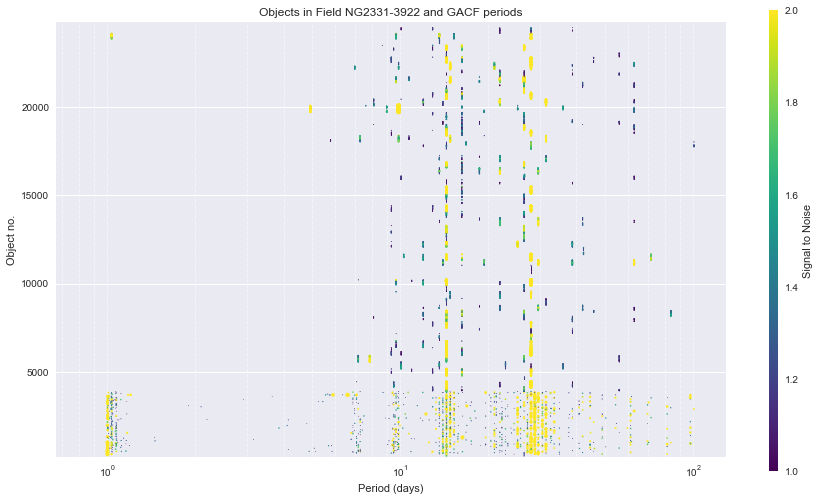

In [6]:
field.plot_objects_vs_period(interactive=True)

In [7]:
import matplotlib as mpl
def plot_objects_vs_period(self, calculate=False, signal_to_noise=False, fig_ax_tuple=None,
                           save_if_true_else_return=True, interactive=False):
    if calculate:
        self.calculate_periods_from_autocorrelation(calculate_noise=signal_to_noise)
    if fig_ax_tuple is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    else:
        fig, ax = fig_ax_tuple

    max_signal_to_noise = max([max(obj.peak_signal_to_noise) for obj in self if np.array(obj.peak_signal_to_noise).size > 0])
    min_signal_to_noise = min([min(obj.peak_signal_to_noise) for obj in self if np.array(obj.peak_signal_to_noise).size > 0])
    min_obj_id = np.inf
    max_obj_id = 0

    if fig_ax_tuple is None:
        c_min = 1
        c_max = 2  # max_signal_to_noise
        axc = fig.add_axes([0.95, 0.1, 0.01, 0.8])
        norm = mpl.colors.Normalize(vmin=c_min, vmax=c_max)
        cb = mpl.colorbar.ColorbarBase(axc, norm=norm, cmap=mpl.cm.viridis, orientation='vertical')
        cb.set_clim(vmin=c_min, vmax=c_max)
        cb.set_label("Signal to Noise")

    for i, obj in enumerate(self):
        periods = obj.periods
        color = obj.peak_signal_to_noise

        obj_id = int(obj.obj)
        if obj_id > max_obj_id:
            max_obj_id = obj_id
        elif obj_id < min_obj_id:
            min_obj_id = obj_id

        if np.array(color).size > 0:
            size = np.interp(color, (min_signal_to_noise, max_signal_to_noise), (0.1, 20))
        else:
            size = color
        y = np.linspace(obj_id, obj_id, len(periods))
        # ax.scatter(periods, y, s=size, c='k')
        ax.scatter(periods, y, c=color, cmap=mpl.cm.viridis, s=size, norm=norm)

    if fig_ax_tuple is None:
        ax.set_ylabel('Object no.')
        ax.set_xlabel('Period (days)')
        ax.set_xscale('log')
        ax.xaxis.grid(True, linestyle='--', alpha=0.5, which='both', lw=1)
        ax.set_xlim(left=0)
        ax.set_ylim([min_obj_id*0.8, max_obj_id + (min_obj_id*0.2)])
        ax.set_title('Objects in Field {} and GACF periods'.format(self.fieldname))
        # ax.set_yticks(np.linspace(0, self.num_objects - 1, self.num_objects))
        # ax.set_yticklabels(['obj_id {}'.format(obj.obj) for obj in self], fontdict={'fontsize': 6})



        # ax.set_facecolor('lightgray')

        # ax.set_yticks(np.append(ax.get_yticks(), np.linspace(0, self.num_objects - 1, self.num_objects)))
        # ax.set_yticklabels(np.append(ax.get_yticklabels()[1], ['obj_id {}'.format(obj.obj) for obj in self]),
                           # fontdict={'fontsize': 6})

    if save_if_true_else_return:
        if interactive:
            plt.show()
        else:
            fig.savefig(os.path.join(self.filename, 'Objects vs Period.png'))
            plt.close(fig)
            return
    else:
        return fig, ax

In [8]:
field.plot_objects_vs_period = plot_objects_vs_period

In [40]:
field.filename = '/Users/joshbriegal/GitHub/GACF/example/NG2331-3992'

In [41]:
plot_objects_vs_period(field)

IOError: [Errno 2] No such file or directory: '/Users/joshbriegal/GitHub/GACF/example/NG2331-3992/Objects vs Period.png'

In [10]:
%matplotlib
plt.ion()

Using matplotlib backend: MacOSX


In [15]:
sys.path.append('/Users/joshbriegal/GitHub/')
sys.path.append('/Users/joshbriegal/GitHub/ngtsio')

In [16]:
sys.path

['',
 '/Users/joshbriegal/anaconda/envs/python2/lib/python27.zip',
 '/Users/joshbriegal/anaconda/envs/python2/lib/python2.7',
 '/Users/joshbriegal/anaconda/envs/python2/lib/python2.7/plat-darwin',
 '/Users/joshbriegal/anaconda/envs/python2/lib/python2.7/plat-mac',
 '/Users/joshbriegal/anaconda/envs/python2/lib/python2.7/plat-mac/lib-scriptpackages',
 '/Users/joshbriegal/anaconda/envs/python2/lib/python2.7/lib-tk',
 '/Users/joshbriegal/anaconda/envs/python2/lib/python2.7/lib-old',
 '/Users/joshbriegal/anaconda/envs/python2/lib/python2.7/lib-dynload',
 '/Users/joshbriegal/.local/lib/python2.7/site-packages',
 '/Users/joshbriegal/anaconda/envs/python2/lib/python2.7/site-packages',
 '/Users/joshbriegal/anaconda/envs/python2/lib/python2.7/site-packages/Sphinx-1.5.1-py2.7.egg',
 '/Users/joshbriegal/anaconda/envs/python2/lib/python2.7/site-packages/aeosa',
 '/Users/joshbriegal/anaconda/envs/python2/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg',
 '/Users/joshbriegal/anaconda/envs/py

In [17]:
from ngtsio import ngtsio

In [18]:
all_periods = []
for obj in field:
    pds = zip(obj.periods, np.linspace(int(obj.obj), int(obj.obj), len(obj.periods)))
    for p in pds:
        all_periods.append(p)

In [19]:
test1 = np.array([0,1,2,3,4])
test2 = [4,3,2,1,0]
np.append([],zip(test1, test2))

array([0., 4., 1., 3., 2., 2., 3., 1., 4., 0.])

In [20]:
num_bins = 1000

In [21]:
all_periods

[(45.78017134309894, 690.0),
 (27.976714296148938, 6268.0),
 (14.388024495162309, 6268.0),
 (16.24454378486067, 6268.0),
 (9.325571432049646, 6268.0),
 (26.50425342371257, 9901.0),
 (14.388023287158253, 9901.0),
 (26.50425203768642, 12388.0),
 (14.388022534744058, 12388.0),
 (26.504256554290546, 4561.0),
 (27.976720733335902, 2199.0),
 (14.811205094119009, 2199.0),
 (27.976714296148938, 6135.0),
 (14.388024495162309, 6135.0),
 (16.24454378486067, 6135.0),
 (9.325571432049646, 6135.0),
 (10.071617146613617, 6135.0),
 (21.894810488983058, 21804.0),
 (26.504244276137385, 21804.0),
 (41.96506889030951, 11760.0),
 (9.684246382552253, 3198.0),
 (26.504253257511433, 3198.0),
 (33.57205412618115, 3198.0),
 (1.0737330743981177, 3198.0),
 (1.0340468416688238, 3198.0),
 (14.81120251242021, 1571.0),
 (21.894821105316833, 1571.0),
 (1.034046992653567, 1571.0),
 (16.786029514076237, 1571.0),
 (14.388017974368273, 22954.0),
 (55.9534032336544, 22954.0),
 (21.894816548616674, 16492.0),
 (18.6511400228

In [22]:
frequencies = np.array([(1/x, o) for x, o in all_periods])

In [23]:
fig, ax = plt.subplots()
axf = sns.distplot(frequencies, kde=False, bins=np.logspace(np.log10(min(frequencies)), np.log10(max(frequencies)), num_bins))
# axf.set_xscale('log')
minor_locator = tk.LogLocator(numticks=20, subs='auto')
axf.xaxis.set_minor_locator(minor_locator)
axf.grid(b=True, which='minor', color='w', linewidth=0.5)

axf.set_ylabel('Count')
axf.set_xlabel('Frequency (Hz)')

plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [24]:
bin_width = 5e-6
freq_hist = {}
for f, o in frequencies:
    found = False
    for f_bin in freq_hist.keys():
        if abs((f - float(f_bin))) < bin_width:
            freq_hist[f_bin]['Count'] += 1
            freq_hist[f_bin]['id'].append(o)
            found = True
    if not found:
        t_dic = {'Count': 1, 'id': [o]}
        freq_hist[f] = t_dic
            

In [25]:
freq_hist

{0.009928895335417577: {'Count': 19,
  'id': [17843.0,
   2878.0,
   17820.0,
   17812.0,
   17826.0,
   17781.0,
   17819.0,
   17775.0,
   18042.0,
   17842.0,
   18027.0,
   17806.0,
   17761.0,
   17870.0,
   17816.0,
   17822.0,
   17783.0,
   17765.0,
   17872.0]},
 0.01021267884085265: {'Count': 10,
  'id': [3644.0,
   3454.0,
   935.0,
   1390.0,
   2162.0,
   3527.0,
   963.0,
   1558.0,
   1822.0,
   3677.0]},
 0.011914671032948177: {'Count': 52,
  'id': [8335.0,
   8314.0,
   8278.0,
   8172.0,
   2956.0,
   8287.0,
   8362.0,
   8469.0,
   8146.0,
   8450.0,
   8222.0,
   978.0,
   8345.0,
   8281.0,
   8338.0,
   8241.0,
   8254.0,
   8438.0,
   8319.0,
   8192.0,
   8389.0,
   8468.0,
   8363.0,
   8211.0,
   8465.0,
   8217.0,
   8370.0,
   8154.0,
   8418.0,
   8384.0,
   8207.0,
   8316.0,
   8329.0,
   8191.0,
   8424.0,
   8256.0,
   8243.0,
   8466.0,
   8176.0,
   8359.0,
   8440.0,
   8417.0,
   8309.0,
   8328.0,
   8380.0,
   8183.0,
   8276.0,
   8398.0,
   832

In [70]:
freq_hist.values()

[{'Count': 1, 'id': [3304.0]},
 {'Count': 7, 'id': [1011.0, 3609.0, 593.0, 873.0, 2924.0, 1485.0, 989.0]},
 {'Count': 1084,
  'id': [6268.0,
   2199.0,
   6135.0,
   24010.0,
   7562.0,
   18610.0,
   4137.0,
   10191.0,
   18605.0,
   10928.0,
   4875.0,
   20511.0,
   6393.0,
   20673.0,
   7548.0,
   20720.0,
   18489.0,
   17843.0,
   10055.0,
   7305.0,
   14117.0,
   10851.0,
   7079.0,
   24200.0,
   11423.0,
   14433.0,
   7772.0,
   17683.0,
   10127.0,
   22645.0,
   24346.0,
   7689.0,
   14390.0,
   18546.0,
   22703.0,
   7182.0,
   24148.0,
   10132.0,
   14426.0,
   4985.0,
   11436.0,
   9382.0,
   22284.0,
   6114.0,
   7248.0,
   5044.0,
   5319.0,
   18631.0,
   22794.0,
   6047.0,
   5445.0,
   11340.0,
   6947.0,
   14350.0,
   17656.0,
   24188.0,
   4945.0,
   22436.0,
   4209.0,
   6801.0,
   9368.0,
   22380.0,
   6731.0,
   5364.0,
   23909.0,
   2892.0,
   15228.0,
   10036.0,
   17820.0,
   5237.0,
   6087.0,
   14161.0,
   22317.0,
   4370.0,
   10795.0,
  

In [75]:
fig, ax = plt.subplots()
plt.bar(freq_hist.keys(), [x['Count'] for x in freq_hist.values()], 0.001)
# ax.set_ylim(0, max(freq_hist.values()) * 1.2)
# ax.set_xlim(0, 1)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("frequency (1 / days)")
ax.set_ylabel("count")
plt.show()


In [ ]:
sorted( ((k, v) for k,v in freq_hist.iteritems()), reverse=True, key=lambda x: x[1])

In [28]:
vals = sorted( ((k, v) for k,v in freq_hist.iteritems()), reverse=True, key=lambda x: x[0])
plt.plot([v[0] for v in vals], [v[1] for v in vals])

TypeError: float() argument must be a string or a number

In [29]:
only1 = [(k, v['id']) for k, v in  freq_hist.iteritems() if v['Count']<2]
only1_objs = [p[1][0] for p in only1]
only1_objs

[3304.0,
 1800.0,
 2371.0,
 1095.0,
 3579.0,
 3730.0,
 2263.0,
 3682.0,
 1165.0,
 3077.0,
 3676.0,
 1755.0,
 1526.0,
 1165.0,
 2369.0,
 3682.0,
 2285.0,
 1800.0,
 1548.0,
 2930.0,
 3408.0,
 1904.0,
 3682.0,
 3090.0,
 3823.0,
 989.0,
 1186.0,
 3469.0,
 659.0,
 3009.0,
 3700.0,
 2603.0,
 2769.0,
 3372.0,
 3219.0,
 1095.0,
 3161.0,
 464.0,
 2257.0,
 3686.0,
 2488.0,
 803.0,
 3876.0,
 3686.0,
 3823.0,
 814.0,
 2481.0,
 1282.0,
 831.0,
 323.0,
 3686.0,
 825.0,
 2369.0,
 1077.0,
 478.0,
 469.0,
 799.0,
 3424.0,
 2059.0,
 1526.0,
 814.0,
 478.0,
 873.0,
 1944.0,
 2981.0,
 3686.0,
 1632.0,
 1801.0,
 465.0,
 1095.0,
 3310.0,
 3676.0,
 2263.0,
 2368.0,
 1331.0,
 1227.0,
 1944.0]

In [30]:
only1_p = np.divide(1.0, only1)

ValueError: setting an array element with a sequence.

In [31]:
hist, bins = np.histogram(only1_p)

NameError: name 'only1_p' is not defined

In [ ]:
plt.hist(only1_p, 100)
plt.show()

In [43]:
field.object_list = [obj.obj for obj in field]

In [46]:
import getpass
import paramiko
host = 'appcs.ra.phy.cam.ac.uk'
user = 'jtb34'
password = getpass.getpass()

ssh_client = paramiko.SSHClient()
ssh_client.load_system_host_keys()
ssh_client.set_missing_host_key_policy(paramiko.WarningPolicy)
ssh_client.connect(host, username=user, password=password)

········


In [47]:
all_ccd_flux = ngtsio.get_on_server(fieldname=field.fieldname, ngts_version=field.test, obj_id=field.object_list, 
                           keys=['OBJ_ID', "CCD_X", "CCD_Y", "FLUX_MEAN"], ssh_client=ssh_client)

Field name: NG2331-3922
NGTS version: CYCLE1706
Object IDs ( 3433 ): ['000219' '000251' '000310' ... '024793' '024796' '024806']
###############################################################################
Success: All keys successfully read into dictionary.
###############################################################################



In [48]:
for obj in field:
    for i, o in enumerate(all_ccd_flux['OBJ_ID']):
        if int(obj.obj) == int(o):
            obj.ccd_y = all_ccd_flux['CCD_Y'][i]
            obj.ccd_x = all_ccd_flux['CCD_X'][i]
            obj.mean_flux = all_ccd_flux['FLUX_MEAN'][i]

In [66]:
def plot_objects_vs_period(self, calculate=False, signal_to_noise=False, fig_ax_tuple=None,
                           save_if_true_else_return=True, interactive=False):
    if calculate:
        self.calculate_periods_from_autocorrelation(calculate_noise=signal_to_noise)
    if fig_ax_tuple is None:
        fig, (ax, ax1, ax2) = plt.subplots(3, 1, figsize=(12, 8))
    else:
        fig, ax = fig_ax_tuple

#     max_signal_to_noise = max([max(obj.peak_signal_to_noise) for obj in self if np.array(obj.peak_signal_to_noise).size > 0])
#     min_signal_to_noise = min([min(obj.peak_signal_to_noise) for obj in self if np.array(obj.peak_signal_to_noise).size > 0])
    min_obj_id = np.inf
    max_obj_id = 0
    cmap = mpl.cm.viridis

    if fig_ax_tuple is None:
        c_min = 1
        c_max = 2  # max_signal_to_noise
        axc = fig.add_axes([0.95, 0.1, 0.01, 0.8])
        norm = mpl.colors.Normalize(vmin=c_min, vmax=c_max)
        cb = mpl.colorbar.ColorbarBase(axc, norm=norm, cmap=cmap, orientation='vertical')
        cb.set_clim(vmin=c_min, vmax=c_max)
        cb.set_label("Signal to Noise")
        
    duration = 251.8615856329
    freq_diff = (1 / duration) / 2
    start_freq = 0.0456729155
    start_freq2 = 0.03472159
    precision = 5e-5

    for i, obj in enumerate(self):
#         periods = np.divide(1.0, obj.periods)
        periods = obj.periods
        color = obj.peak_signal_to_noise
        # prune periods which are aliases
#         if i%100 == 0:
#             for p in periods:
#                 a = abs((p-start_freq)) % freq_diff
#                 print "{:.2e} ({:.2e}) => {}".format(a, precision, a<precision)
#                 old_len = len(periods)
# #                 print "len periods {}".format(len(periods))
#         periodss = [(p,c) for p,c in zip(periods, color) if abs((p-start_freq)) % freq_diff > precision]
#         periods = [p[0] for p in periodss]
#         if i%100 == 0:
#             print "len periods {}->{}".format(old_len, len(periods))
#         color = [p[1] for p in periodss]
        

        obj_id = int(obj.obj)
        ccd_x = obj.ccd_x
        ccd_y = obj.ccd_y
        flux = obj.mean_flux
        if obj_id > max_obj_id:
            max_obj_id = obj_id
        elif obj_id < min_obj_id:
            min_obj_id = obj_id

        if np.array(color).size > 0:
            size = np.interp(color, (c_min, c_max), (0.1, 2))
        else:
            size = color
#         y = np.linspace(obj_id, obj_id, len(periods))
        y = np.linspace(flux, flux, len(periods))
        y1 = np.linspace(ccd_x, ccd_y, len(periods))
        y2 = np.linspace(ccd_y, ccd_y, len(periods))        
        # ax.scatter(periods, y, s=size, c='k')
        ax.scatter(periods, y, c=color, cmap=cmap, s=size, norm=norm)
        ax1.scatter(periods, y1, c=color, cmap=cmap, s=size, norm=norm)
        ax2.scatter(periods, y2, c=color, cmap=cmap, s=size, norm=norm)

    if fig_ax_tuple is None:
        ax.set_ylabel('Mean Flux of Object LC')
#         ax.set_ylabel("Object ID")
        ax1.set_ylabel("X CCD Position")
        ax2.set_ylabel("Y CCD Position")
        ax2.set_xlabel('Period (days)')
        
        # set up logscale
        ax.set_yscale('log')
        locmaj = mpl.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
        locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10 )) 
        ax.yaxis.set_major_locator(locmaj)
        ax.yaxis.set_minor_locator(locmin)
        ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
        
        for a in (ax, ax1, ax2):
#             a.set_xlabel('Period (days)')
        #         ax.set_xscale('log')
            a.xaxis.grid(True, linestyle='--', alpha=0.5, which='both', lw=1)
        #         ax.set_xlim(left=0)
        ax.set_ylim([min_obj_id*0.8, max_obj_id + (min_obj_id*0.2)])
        ax1.set_ylim(0, 2048)
        ax2.set_ylim
        fig.suptitle('Objects in Field {} and GACF periods'.format(self.fieldname))
#         fig.tight_layout()
        # ax.set_yticks(np.linspace(0, self.num_objects - 1, self.num_objects))
        # ax.set_yticklabels(['obj_id {}'.format(obj.obj) for obj in self], fontdict={'fontsize': 6})



        # ax.set_facecolor('lightgray')

        # ax.set_yticks(np.append(ax.get_yticks(), np.linspace(0, self.num_objects - 1, self.num_objects)))
        # ax.set_yticklabels(np.append(ax.get_yticklabels()[1], ['obj_id {}'.format(obj.obj) for obj in self]),
                           # fontdict={'fontsize': 6})
#         duration = field[0].timeseries_binned[-1] - field[0].timeseries_binned[0]

#         for a in (ax, ax1, ax2):
#             for i in xrange(1000):
#                 upper_freq = start_freq2 + (freq_diff * i)
#                 lower_freq = start_freq2 - (freq_diff * i)
#                 if lower_freq > 0.:
#                     a.axvline(x=lower_freq, c='b', lw=0.5)
#                 if upper_freq < 1.:
#                     a.axvline(x=upper_freq, c='b', lw=0.5)
# #             ax.axvline(x=start_freq2 + (freq_diff * i), c='b', lw=0.5)
# #             ax.axvline(x=start_freq2 - (freq_diff * i), c='b', lw=0.5)
            

    if save_if_true_else_return:
        if interactive:
            plt.show()
        else:
            fig.savefig(os.path.join(self.filename, 'Objects vs Period.png'))
            plt.close(fig)
            return
    else:
        return fig, ax

In [67]:
plot_objects_vs_period(field, interactive=True)